# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

# Описание данных

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:

id — номер записи;

adults — количество взрослых постояльцев;

arrival_date_year — год заезда;

arrival_date_month — месяц заезда;

arrival_date_week_number — неделя заезда;

arrival_date_day_of_month — день заезда;

babies — количество младенцев;

booking_changes — количество изменений параметров заказа;

children — количество детей от 3 до 14 лет;

country — гражданство постояльца;

customer_type — тип заказчика:

Contract — договор с юридическим лицом;

Group — групповой заезд;

Transient — не связано с договором или групповым заездом;

Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.

days_in_waiting_list — сколько дней заказ ожидал подтверждения;

distribution_channel — канал дистрибуции заказа;

is_canceled — отмена заказа;

is_repeated_guest — признак того, что гость бронирует номер второй раз;

lead_time — количество дней между датой бронирования и датой прибытия;

meal — опции заказа:

SC — нет дополнительных опций;

BB — включён завтрак;

HB — включён завтрак и обед;

FB — включён завтрак, обед и ужин.

previous_bookings_not_canceled — количество подтверждённых заказов у клиента;

previous_cancellations — количество отменённых заказов у клиента;

required_car_parking_spaces — необходимость места для автомобиля;

reserved_room_type — тип забронированной комнаты;

stays_in_weekend_nights — количество ночей в выходные дни;

stays_in_week_nights — количество ночей в будние дни;

total_nights — общее количество ночей;

total_of_special_requests — количество специальных отметок.

# Импортируем необходимые библиотеки

In [1]:
#pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
RANDOM_STATE = RandomState(0)
from math import ceil
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve


pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', 100)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\lebed\AppData\Local\Temp\ipykernel_2640\3277352987.py:33: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Шаг 1. Откройте файлы с данными

In [3]:
def my_func(x):
    print('------------- Исходный датафрейм -------------')
    display(x.head())
    display(x.tail())
    print('')
    print('')
    print('------------- Общая информация о датафрейме -------------')
    print('')
    print('')
    display(x.info())
    print('------------- Количество пустых значений в датафрейме -------------')
    print('')
    print('')
    display(x.isna().sum())
    print('------------- Количество явных дубликатов в датафрейме -------------')
    display(x.duplicated().sum())
    print('')
    print('')
    print('------------- Описательная статистика -------------')
    display(x.describe())
    print('')
    print('')
    print('------------- Размер датасета -------------')
    display(x.shape)
    
df_train = pd.read_csv(r"C:\Users\lebed\Downloads\hotel_train.csv")
df_test = pd.read_csv(r"C:\Users\lebed\Downloads\hotel_test.csv")

my_func(df_train)
my_func(df_test)

------------- Исходный датафрейм -------------


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.00,2015,July,27,1,0,1,1.00,0.00,0.00,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.00,2015,July,27,1,0,2,2.00,0.00,0.00,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.00,2015,July,27,1,0,2,2.00,0.00,0.00,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.00,2015,July,27,1,0,2,2.00,0.00,0.00,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.00,2015,July,27,1,0,3,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
65224,84057,0,23.00,2016,December,53,30,2,4,2.00,0.00,0.00,BB,CHN,TA/TO,0,0,0,D,0,0,Transient,0,2,6
65225,84063,0,53.00,2016,December,53,31,2,3,2.00,0.00,0.00,HB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,3,5
65226,84094,0,7.00,2016,December,53,31,2,4,2.00,0.00,0.00,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.00,2016,December,53,30,2,5,2.00,0.00,0.00,SC,FRA,TA/TO,0,0,0,A,0,0,Transient,0,1,7
65228,84121,0,107.00,2016,December,53,31,2,5,2.00,0.00,0.00,BB,FRA,TA/TO,0,0,0,A,0,0,Transient,0,0,7




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                         

None

------------- Количество пустых значений в датафрейме -------------




id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


0



------------- Описательная статистика -------------


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,"65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00","65,229.00"
mean,"43,544.07",0.37,96.34,"2,015.72",31.34,15.85,0.83,2.22,1.84,0.07,0.01,0.03,0.13,0.11,0.19,3.33,0.06,0.51,3.05
std,"25,614.86",0.48,96.13,0.45,13.46,8.75,0.85,1.35,0.48,0.33,0.10,0.16,0.97,1.33,0.59,18.24,0.23,0.75,1.74
min,0.00,0.00,0.00,"2,015.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"19,108.00",0.00,17.00,"2,015.00",21.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,"40,554.00",0.00,64.00,"2,016.00",34.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
75%,"67,414.00",1.00,151.00,"2,016.00",42.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00
max,"84,121.00",1.00,374.00,"2,016.00",53.00,31.00,4.00,6.00,4.00,3.00,10.00,1.00,26.00,58.00,17.00,259.00,3.00,5.00,10.00




------------- Размер датасета -------------


(65229, 25)

------------- Исходный датафрейм -------------


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,1,0,2.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2,2,2.00,0.00,0.00,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,2,2,1.00,0.00,0.00,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2,5,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
32407,97899,0,164.00,2017,August,35,31,2,4,2.00,0.00,0.00,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,0,6
32408,97900,0,21.00,2017,August,35,30,2,5,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,2,7
32409,97901,0,23.00,2017,August,35,30,2,5,2.00,0.00,0.00,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7
32410,97902,0,34.00,2017,August,35,31,2,5,2.00,0.00,0.00,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,4,7
32411,97903,0,109.00,2017,August,35,31,2,5,2.00,0.00,0.00,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,0,7




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                         

None

------------- Количество пустых значений в датафрейме -------------




id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


0



------------- Описательная статистика -------------


,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,"32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00","32,412.00"
mean,"60,131.51",0.39,97.59,"2,017.00",17.80,15.66,0.87,2.34,1.86,0.08,0.01,0.03,0.01,0.17,0.22,0.26,0.05,0.66,3.21
std,"29,953.59",0.49,86.51,0.00,9.18,8.77,0.85,1.38,0.49,0.34,0.08,0.17,0.18,1.88,0.64,4.73,0.22,0.83,1.74
min,"6,086.00",0.00,0.00,"2,017.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"45,291.75",0.00,23.00,"2,017.00",10.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,"53,394.50",0.00,76.00,"2,017.00",18.00,15.50,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
75%,"89,800.25",1.00,155.00,"2,017.00",25.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00
max,"97,903.00",1.00,373.00,"2,017.00",35.00,31.00,4.00,6.00,4.00,3.00,2.00,1.00,6.00,72.00,18.00,223.00,8.00,5.00,10.00




------------- Размер датасета -------------


(32412, 25)

Из представленных данных видно, что тренировочная и тестовая выборка представлена в одинаковом количестве колонок с одинаковыми названиями. Тренировочная выборка представлена за июля 2015 по декабрь 2016 года, тестовая выборка с янаваря по август 2017 года. 

Названия столбцов имеют змеинный формат.

явных дубликатов не обнаружено.

Столбцы:
 1) id - не содержит полезной информации, это не уникальный номер пользователя. можем удалить из обоих сетов
 
 2) lead_time,adults,children,babies представлены в числовом формате, но имеют тип данных float64. нужно изменить в int64
 
 
 
 3) кроме max 10 babies в тренировочном сете, не видно аномальных значений.
 
 4) проверим столбцы arrival_date_month,meal,country, distribution_channel, reserved_room_type и customer_type на уникальность
 

Целевым признаком является столбец is_canceled



### Шаг 2. Предобработка и исследовательский анализ данных

Удалим столбец id из тренировочной и тестовой выборки

In [4]:
df_train.drop(['id'], axis='columns', inplace=True)
df_test.drop(['id'], axis='columns', inplace=True)

In [5]:
display(df_train.shape)
display(df_test.shape)

(65229, 24)

(32412, 24)

In [6]:
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())

21377

7717

После удаления столбца id повились дубликаты,удалим их только из тренировочного сета. тестовый трогать не будем, т.к. это может привести к оптимистично завышенной оценке качества модели.

In [7]:
df_train.drop_duplicates(inplace=True)

In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train.shape

(43852, 24)

Преобразуем столбцы с типом данных float64 в int64

In [10]:
df_train[['lead_time', 'adults', 'children', 'babies']] = df_train[['lead_time', 'adults', 'children', 'babies']
                                                                      ].astype('int64')
df_test[['lead_time', 'adults', 'children', 'babies']] = df_test[['lead_time', 'adults', 'children', 'babies']
                                                                      ].astype('int64')
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43852 entries, 0 to 65228
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     43852 non-null  int64 
 1   lead_time                       43852 non-null  int64 
 2   arrival_date_year               43852 non-null  int64 
 3   arrival_date_month              43852 non-null  object
 4   arrival_date_week_number        43852 non-null  int64 
 5   arrival_date_day_of_month       43852 non-null  int64 
 6   stays_in_weekend_nights         43852 non-null  int64 
 7   stays_in_week_nights            43852 non-null  int64 
 8   adults                          43852 non-null  int64 
 9   children                        43852 non-null  int64 
 10  babies                          43852 non-null  int64 
 11  meal                            43852 non-null  object
 12  country                         43852 non-null  obj

проверим столбцы с форматем object на уникальность

In [11]:
display(df_train['arrival_date_month'].sort_values(ascending=False).unique())
display(len(df_train['arrival_date_month'].unique()))

display(df_test['arrival_date_month'].sort_values(ascending=False).unique())
display(len(df_test['arrival_date_month'].unique()))

array(['September', 'October', 'November', 'May', 'March', 'June', 'July',
       'January', 'February', 'December', 'August', 'April'], dtype=object)

12

array(['May', 'March', 'June', 'July', 'January', 'February', 'August',
       'April'], dtype=object)

8

12 месяцв в году и в тренировочном сете, 8 месяцев в тестовом

In [12]:
display(df_train['country'].sort_values(ascending=False).unique())
display(len(df_train['country'].unique()))

display(df_test['country'].sort_values(ascending=False).unique())
display(len(df_test['country'].unique()))

array(['ZWE', 'ZMB', 'ZAF', 'VNM', 'VGB', 'VEN', 'UZB', 'USA', 'URY',
       'UKR', 'UGA', 'TZA', 'TWN', 'TUR', 'TUN', 'TMP', 'TJK', 'THA',
       'SYR', 'SYC', 'SWE', 'SVN', 'SVK', 'SUR', 'STP', 'SRB', 'SMR',
       'SLV', 'SGP', 'SEN', 'SAU', 'RWA', 'RUS', 'ROU', 'QAT', 'PYF',
       'PRY', 'PRT', 'PRI', 'POL', 'PLW', 'PHL', 'PER', 'PAN', 'PAK',
       'OMN', 'NZL', 'NOR', 'NLD', 'NIC', 'NGA', 'NAM', 'MYS', 'MWI',
       'MUS', 'MOZ', 'MNE', 'MMR', 'MLT', 'MLI', 'MKD', 'MEX', 'MDV',
       'MCO', 'MAR', 'MAC', 'LVA', 'LUX', 'LTU', 'LKA', 'LIE', 'LCA',
       'LBY', 'LBN', 'KWT', 'KOR', 'KNA', 'KHM', 'KEN', 'KAZ', 'JPN',
       'JOR', 'JEY', 'JAM', 'ITA', 'ISR', 'ISL', 'IRQ', 'IRN', 'IRL',
       'IND', 'IMN', 'IDN', 'HUN', 'HRV', 'HND', 'HKG', 'GUY', 'GRC',
       'GNB', 'GLP', 'GIB', 'GGY', 'GEO', 'GBR', 'GAB', 'FRA', 'FIN',
       'ETH', 'EST', 'ESP', 'EGY', 'ECU', 'DZA', 'DOM', 'DNK', 'DMA',
       'DEU', 'CZE', 'CYP', 'CYM', 'CUB', 'CRI', 'CPV', 'COL', 'CN',
       'CMR', 'CIV', 

155

array(['ZWE', 'ZAF', 'VNM', 'VEN', 'UZB', 'USA', 'URY', 'UMI', 'UKR',
       'TZA', 'TWN', 'TUR', 'TUN', 'TJK', 'THA', 'TGO', 'SYR', 'SYC',
       'SWE', 'SVN', 'SVK', 'SUR', 'STP', 'SRB', 'SLV', 'SLE', 'SGP',
       'SEN', 'SDN', 'SAU', 'RUS', 'ROU', 'QAT', 'PRY', 'PRT', 'PRI',
       'POL', 'PHL', 'PER', 'PAN', 'PAK', 'NZL', 'NPL', 'NOR', 'NLD',
       'NGA', 'NCL', 'MYT', 'MYS', 'MUS', 'MRT', 'MOZ', 'MNE', 'MLT',
       'MEX', 'MDV', 'MDG', 'MCO', 'MAR', 'MAC', 'LVA', 'LUX', 'LTU',
       'LKA', 'LIE', 'LBY', 'LBN', 'LAO', 'KWT', 'KOR', 'KIR', 'KEN',
       'KAZ', 'JPN', 'JOR', 'JEY', 'JAM', 'ITA', 'ISR', 'ISL', 'IRQ',
       'IRN', 'IRL', 'IND', 'IMN', 'IDN', 'HUN', 'HRV', 'HKG', 'GTM',
       'GRC', 'GNB', 'GIB', 'GHA', 'GBR', 'GAB', 'FRO', 'FRA', 'FJI',
       'FIN', 'ETH', 'EST', 'ESP', 'EGY', 'ECU', 'DZA', 'DOM', 'DNK',
       'DEU', 'CZE', 'CYP', 'CUB', 'CRI', 'CPV', 'COL', 'CN', 'CMR',
       'CIV', 'CHN', 'CHL', 'CHE', 'CAF', 'BRA', 'BLR', 'BIH', 'BHS',
       'BHR', 'BGR', 

143

Приведем страны к общему кол-ву в двух сетах

In [13]:
other_country = df_train['country'].value_counts(normalize=True)
df_train.loc[df_train['country'].isin(other_country[other_country < 0.015].index), 'country'] = 'other'
other_country = df_test['country'].value_counts(normalize=True)
df_test.loc[df_test['country'].isin(other_country[other_country < 0.015].index), 'country'] = 'other'

In [14]:
display(df_train['country'].sort_values(ascending=False).unique())
display(len(df_train['country'].unique()))

display(df_test['country'].sort_values(ascending=False).unique())
display(len(df_test['country'].unique()))

array(['other', 'USA', 'PRT', 'NLD', 'ITA', 'IRL', 'GBR', 'FRA', 'ESP',
       'DEU', 'CHE', 'BRA', 'BEL'], dtype=object)

13

array(['other', 'USA', 'PRT', 'NLD', 'ITA', 'IRL', 'GBR', 'FRA', 'ESP',
       'DEU', 'CHE', 'BRA', 'BEL'], dtype=object)

13

In [15]:
display(df_train['meal'].sort_values(ascending=False).unique())
display(len(df_train['meal'].unique()))

display(df_test['meal'].sort_values(ascending=False).unique())
display(len(df_test['meal'].unique()))

array(['SC       ', 'SC', 'HB       ', 'FB       ', 'BB       '],
      dtype=object)

5

array(['SC       ', 'SC', 'HB       ', 'FB       ', 'BB       '],
      dtype=object)

5

и в тестовом и в тренировочном, должно быть 4 показателя пакета, у нас получается 5 из-за пробелов в SC. Нужно устранить.

In [16]:
display(df_train['distribution_channel'].sort_values(ascending=False).unique())
display(len(df_train['distribution_channel'].unique()))

display(df_test['distribution_channel'].sort_values(ascending=False).unique())
display(len(df_test['distribution_channel'].unique()))

array(['TA/TO', 'GDS', 'Direct', 'Corporate'], dtype=object)

4

array(['TA/TO', 'GDS', 'Direct', 'Corporate'], dtype=object)

4

по каналам бронирования тоже все ок, 4 и там и там

In [17]:
display(df_train['reserved_room_type'].sort_values(ascending=False).unique())
display(len(df_train['reserved_room_type'].unique()))

display(df_test['reserved_room_type'].sort_values(ascending=False).unique())
display(len(df_test['reserved_room_type'].unique()))

array(['G               ', 'F               ', 'E               ',
       'D               ', 'C               ', 'B               ',
       'A               '], dtype=object)

7

array(['G               ', 'F               ', 'E               ',
       'D               ', 'C               ', 'B               ',
       'A               '], dtype=object)

7

по 7 категорий номеров в двух сетах в одном стиле, но лучше избавиться от пробелов 

In [18]:
display(df_train['customer_type'].sort_values(ascending=False).unique())
display(len(df_train['customer_type'].unique()))

display(df_test['customer_type'].sort_values(ascending=False).unique())
display(len(df_test['customer_type'].unique()))

array(['Transient-Party', 'Transient', 'Group', 'Contract'], dtype=object)

4

array(['Transient-Party', 'Transient', 'Group', 'Contract'], dtype=object)

4

по 4 типа клиентов

таким образом уберем пробелы из столбца meal и reserved_room_type

In [19]:
df_train['reserved_room_type'] = df_train['reserved_room_type'].str.strip()
df_test['reserved_room_type'] = df_test['reserved_room_type'].str.strip()
df_train['meal'] = df_train['meal'].str.strip()
df_test['meal'] = df_test['meal'].str.strip()

In [20]:
display(df_train['reserved_room_type'].sort_values(ascending=False).unique())
display(len(df_train['reserved_room_type'].unique()))

display(df_test['reserved_room_type'].sort_values(ascending=False).unique())
display(len(df_test['reserved_room_type'].unique()))

display(df_train['meal'].sort_values(ascending=False).unique())
display(len(df_train['meal'].unique()))

display(df_test['meal'].sort_values(ascending=False).unique())
display(len(df_test['meal'].unique()))


array(['G', 'F', 'E', 'D', 'C', 'B', 'A'], dtype=object)

7

array(['G', 'F', 'E', 'D', 'C', 'B', 'A'], dtype=object)

7

array(['SC', 'HB', 'FB', 'BB'], dtype=object)

4

array(['SC', 'HB', 'FB', 'BB'], dtype=object)

4

In [21]:
categor_number = ['is_canceled', 'arrival_date_month','meal','country','distribution_channel','is_repeated_guest','reserved_room_type',
            'customer_type']
digit = df_train.columns.drop(categor_number).to_list()

In [22]:
def plot_bar(data, nmf, lines, fig_size):
   
    
    fig, axes = plt.subplots(lines, ceil(len(nmf) / lines), figsize = fig_size, constrained_layout = True)

    
    for ax, feat in zip(axes.flatten(), nmf):
        graph = sns.countplot(x = data[feat], color = '#726651', ax = ax, order = data[feat].value_counts(ascending = True).index)
        ax.tick_params(axis = 'x', rotation = 90, size = 20)
        ax.set_ylabel('')
        
        
        if data[feat].unique().shape[0] < 10:
            for p in graph.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / float(len(data)))
                x = p.get_x() + p.get_width() / 2 - 0.25
                y = p.get_y() + p.get_height()
                graph.annotate(percentage, (x, y), size = 20)

    fig.suptitle('Графические данные по категориональным позициям', fontsize = 25)

    
    plt.show()

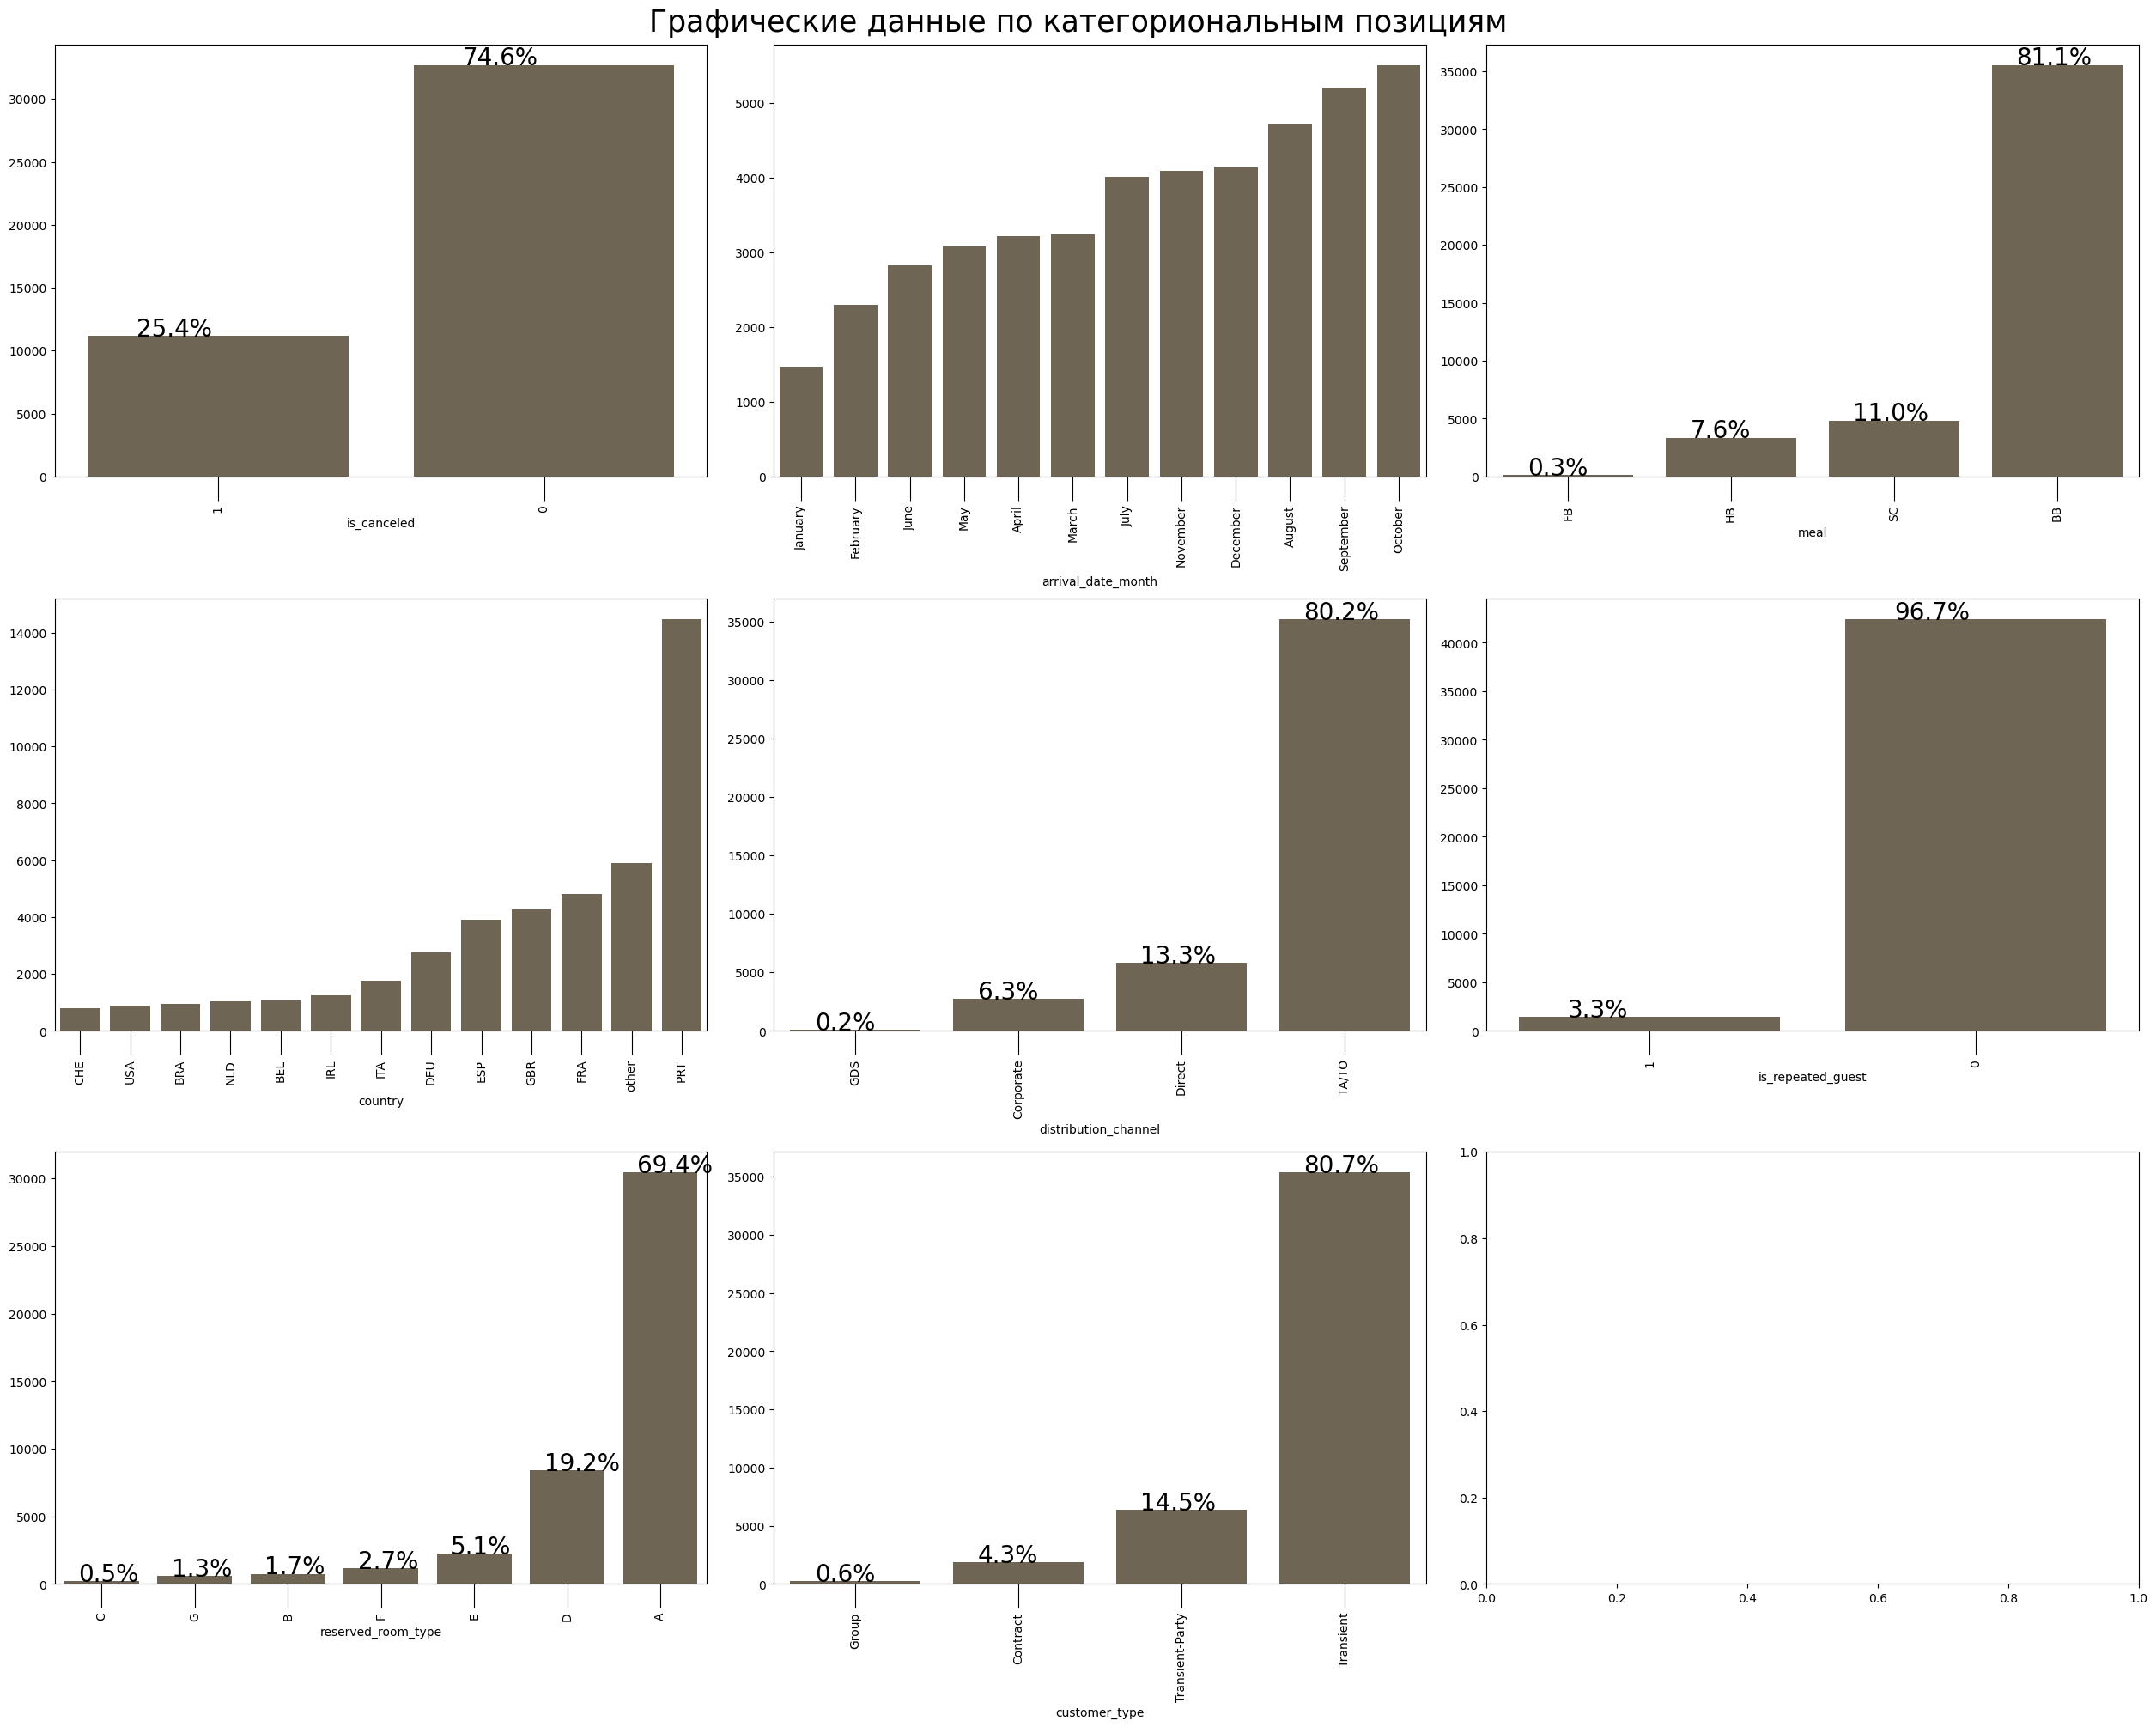

In [23]:
plot_bar(df_train, categor_number, 3, (25,20))

Из категориональных данных видно, что у нас имеется дисбалас в целевом признаке, т.е. по факту кол-во отмен не такое большое, всего 25 %, 75 % бронирований прибывают в отель. Самым популярным месяцем является октябрь, сентябрь и август,самым печальным по загрузке выглядит январь. большое кол-во гостей 81  % выбирают предложение с вкл. завтраком. Портрет гостя выглядит следующим оброазом - доминирующее кол-во гостей из Португалии и в равной степени бронируются франция, великобритания, испания, после объединения стран с низким кол-во нн,получили страны other порядка 5000 н.н. , основным каналом бронирования являются агентсва и их доля составляет 80 %, значительная доля 96,7 % новых гостей, которые бронировали гостиницу в данном периоде. Порядка 70 % гостей выбирают категорию А ( на минуточку, самую дорогую из списка) и порядка 19 % категорию D( 4 позицию по тарифу),практически все гости бронируются индивидуально, групповая база минимальная 

In [24]:
def plot_bar(data, nmf, lines, fig_size):
   
    
    fig, axes = plt.subplots(lines, ceil(len(nmf) / lines), figsize = fig_size, constrained_layout = True)

    
    for ax, feat in zip(axes.flatten(), nmf):
        graph = sns.countplot(x = data[feat], color = '#ff9966', ax = ax, order = data[feat].value_counts(ascending = True).index)
        ax.tick_params(axis = 'x', rotation = 30, size = 20)
        ax.set_ylabel('')
        
        
        if data[feat].unique().shape[0] < 10:
            for p in graph.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / float(len(data)))
                x = p.get_x() + p.get_width() / 2 - 0.25
                y = p.get_y() + p.get_height()
                graph.annotate(percentage, (x, y), size = 20)

    fig.suptitle('Графические данные по цифровым позициям', fontsize = 25)

    
    plt.show()

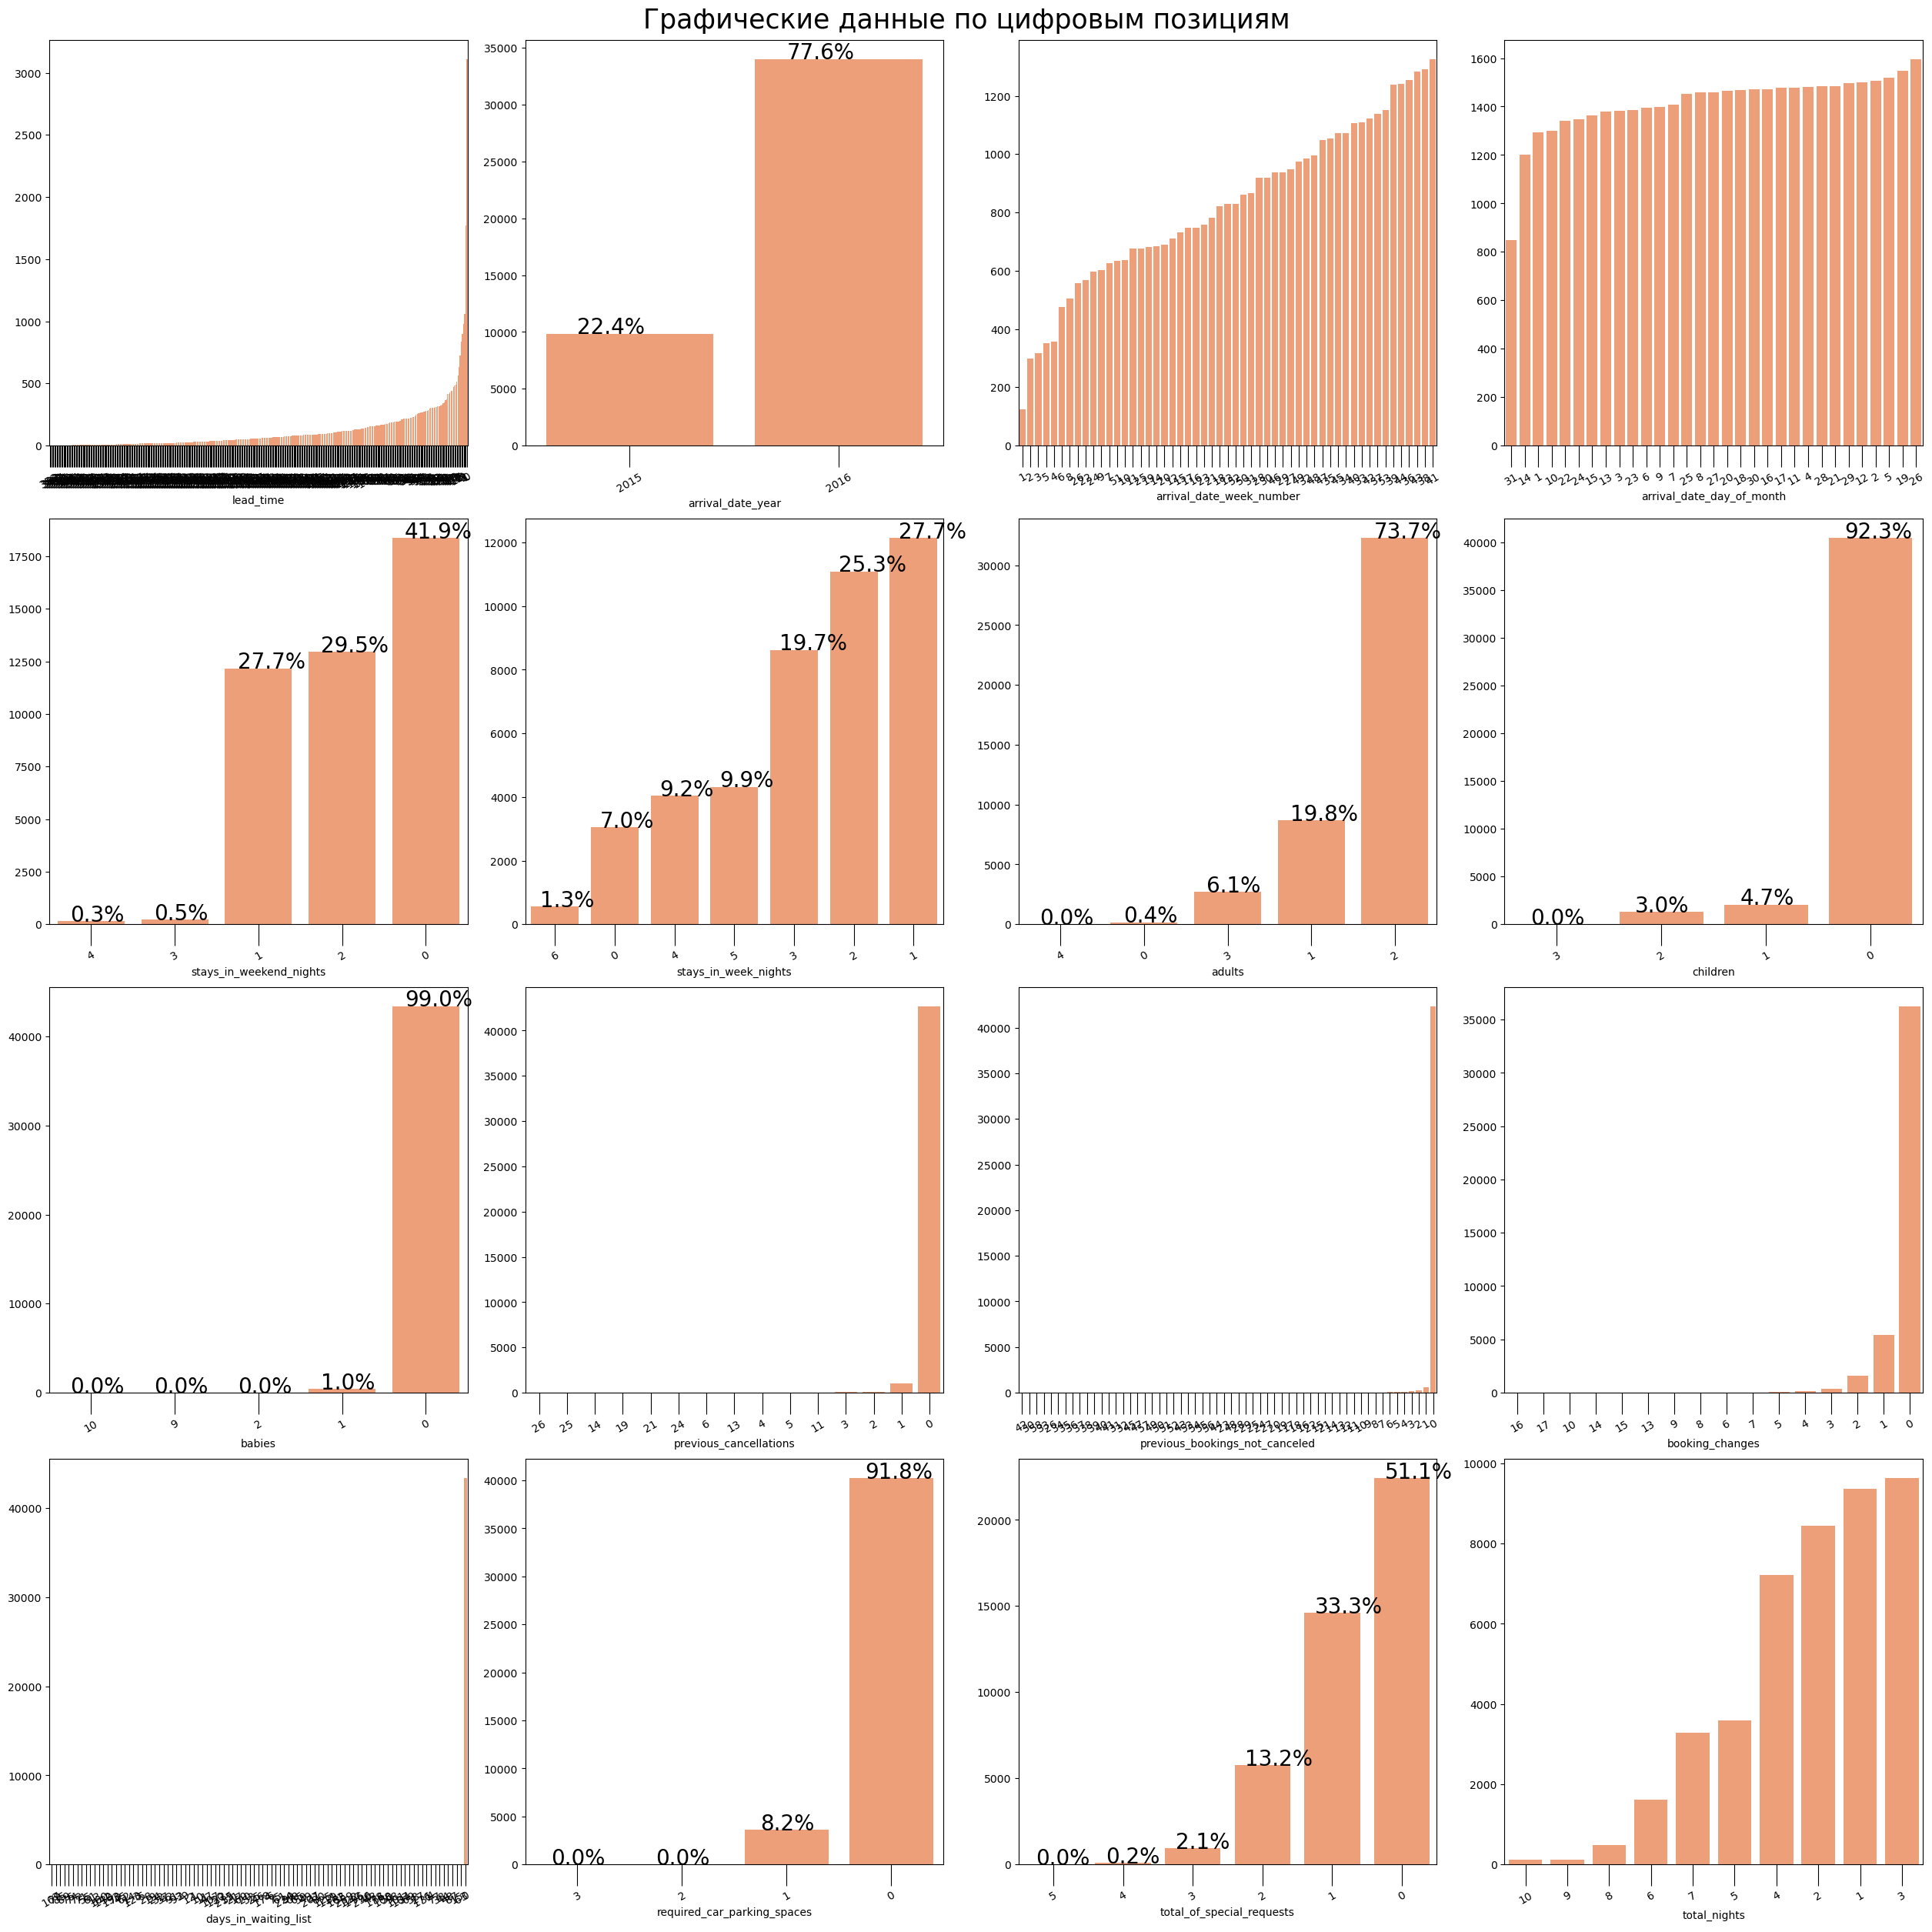

In [25]:
plot_bar(df_train, digit, 4, (25,25))

Из представленных графиков видно, что основная масса гостей бронируюется  день в день или в течении недели, совсем не большое кол-во бронируется за год, значительная часть бронирований приходится на 2016 год, порядка 78 %. практически в равных долях распределены кол-во н/н в неделя 41,38,43, что естественно коррелируется с месяцем, распределение по дням показывает оринтирвочный баланс,кроме 31 числа,но тут можно сказать,что их просто меньше в году. В выходные чаще всего бронируются на 2 ночи (порядка 30 %) и порядка 28 % на 1 ночь. в будни в основная масса гостей предпочитает 1 ночь (27,7 %),на втором месте 2 ночи (25,3 %) и на третьем месте - 3 ночи 20 %. чаще всего бронируются 2 гостя (74%), 1 гость порядка 20 %. Без детей приезжают порядка 92 % и без маленьких детей 99 % . показатели отмен практически приблежаются к 100% ,в целом как и показатель WL, большое кол-во бронирований не изменяется после бронируния и не требуют паркинга,специальные запрос запрашивают порядка 50 % гостей. ПО общему кол-во ночей видно, что больше всего бронируются на 3 ночи,потом на 1 и далее на 2, в целом показатель проживания в 4 ночи, тоже не намного ниже

In [26]:
for val in categor_number:
    print(val)
    print(df_train[val].value_counts())
    print()

is_canceled
is_canceled
0    32704
1    11148
Name: count, dtype: int64

arrival_date_month
arrival_date_month
October      5514
September    5212
August       4725
December     4135
November     4099
July         4016
March        3247
April        3219
May          3086
June         2828
February     2300
January      1471
Name: count, dtype: int64

meal
meal
BB    35552
SC     4821
HB     3344
FB      135
Name: count, dtype: int64

country
country
PRT      14467
other     5888
FRA       4825
GBR       4274
ESP       3908
DEU       2754
ITA       1774
IRL       1236
BEL       1079
NLD       1033
BRA        948
USA        876
CHE        790
Name: count, dtype: int64

distribution_channel
distribution_channel
TA/TO        35185
Direct        5822
Corporate     2755
GDS             90
Name: count, dtype: int64

is_repeated_guest
is_repeated_guest
0    42408
1     1444
Name: count, dtype: int64

reserved_room_type
reserved_room_type
A    30445
D     8423
E     2254
F     1178
B      745


Видим , что в абсолютных величинах, кол-во отмен составляет 11148,при 32704 не отменненых бронированиях.В октябре 5514,в то время,как в январе 1471 нн,как уже описывал выше, привалирующее число гостей выбирает пакет завтрака, таких 35552, граждан португалии 14467,пришло из ОТА 35185 нн,всего 1444 гостей, которые уже были в гостинице, 30445 гостей воспользовались самым дорогим номером.всего 259 н\н в групповом сегменте

In [27]:
for di in digit:
    print(di)
    print(df_train[di].value_counts())
    print()

lead_time
lead_time
0      3110
1      1770
2      1057
3       976
4       896
       ... 
373       1
340       1
367       1
374       1
352       1
Name: count, Length: 369, dtype: int64

arrival_date_year
arrival_date_year
2016    34008
2015     9844
Name: count, dtype: int64

arrival_date_week_number
arrival_date_week_number
41    1326
38    1292
43    1284
36    1254
44    1240
39    1237
53    1152
37    1137
42    1123
33    1108
40    1105
34    1072
45    1072
35    1054
47    1047
48     996
32     986
49     973
27     948
46     937
29     937
30     919
28     918
31     866
50     861
52     829
13     828
18     822
21     782
23     759
16     748
17     748
15     731
12     711
20     688
14     683
19     680
25     677
11     677
10     636
51     634
7      625
9      601
24     597
22     569
26     556
8      505
6      476
4      357
5      351
3      317
2      298
1      123
Name: count, dtype: int64

arrival_date_day_of_month
arrival_date_day_of_month
26   

In [28]:
print('н/н за 2016 год:', df_train.query('arrival_date_year == 2016'
                                                              ).reset_index(drop=True)['arrival_date_month'].value_counts())
print('н/н за 2015 год:', df_train.query('arrival_date_year == 2015'
                                                              ).reset_index(drop=True)['arrival_date_month'].value_counts())

н/н за 2016 год: arrival_date_month
October      3420
March        3247
April        3219
May          3086
August       3067
September    3059
July         2904
June         2828
November     2817
December     2590
February     2300
January      1471
Name: count, dtype: int64
н/н за 2015 год: arrival_date_month
September    2153
October      2094
August       1658
December     1545
November     1282
July         1112
Name: count, dtype: int64


Большое кол-во бронируется в последнии 4 дня или день в день, но стоит отметить, что средний показатель около 100, но как видно и за год бронируются единицы. также, видим что есть выбросы в маленьких детях, порядка 10 . что является старнным,его найдем и удалим, вообще на мой взгляд столбцы с детьми и аннуляциями не принесут пользу для обучения, но удалять их не буду. дополнительно раздилив по годам, видно, что в 2016 год октябрь лучше всего бронировался,на втором месте март и апрель, а в 2015 году сентябрь и октябрь по популярности. 

Проверим также, явные непоследовотельности в данных

In [29]:
df_train[(df_train['adults'] == 0) & (df_train['children'] == 0) & (df_train['babies'] == 0)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
23770,0,48,2016,February,9,21,2,4,0,0,0,SC,CHE,Direct,0,0,0,B,2,0,Transient-Party,0,0,6
26878,0,122,2016,May,19,5,2,4,0,0,0,SC,PRT,TA/TO,0,0,0,E,3,0,Transient,0,0,6
26879,0,122,2016,May,19,5,2,4,0,0,0,SC,CHE,TA/TO,0,0,0,E,3,0,Transient,0,0,6
31570,0,256,2016,August,35,21,3,5,0,0,0,BB,PRT,TA/TO,0,0,0,A,1,0,Transient,0,0,8
41461,0,0,2015,November,49,30,1,2,0,0,0,SC,PRT,Corporate,1,0,1,A,2,0,Transient,0,0,3
50744,0,52,2016,April,18,30,2,4,0,0,0,SC,other,Direct,0,0,0,E,2,0,Transient-Party,0,1,6
54881,0,108,2016,July,28,5,2,5,0,0,0,SC,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,7
56674,0,4,2016,August,32,5,2,2,0,0,0,SC,other,TA/TO,0,0,0,A,2,0,Transient,0,2,4
57390,0,88,2016,August,34,16,0,4,0,0,0,BB,PRT,TA/TO,0,0,0,D,5,0,Transient,0,2,4
58416,0,36,2016,August,35,27,3,6,0,0,0,SC,ESP,TA/TO,0,0,0,A,2,0,Transient,0,2,9


In [30]:
df_train[(df_train['adults'] == 0) & (df_train['children'] > 0) & (df_train['babies'] > 0)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
22534,0,6,2015,December,51,18,0,1,0,2,1,BB,PRT,TA/TO,0,0,0,B,0,0,Transient-Party,0,2,1
44049,1,22,2015,December,50,9,1,4,0,2,1,BB,PRT,Direct,0,0,0,B,1,0,Transient,0,1,5
52923,0,14,2016,June,24,9,0,3,0,2,1,BB,ITA,TA/TO,0,0,0,B,2,0,Transient,0,2,3


In [31]:
df_train[ df_train['babies'] > 2]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
22995,0,37,2016,January,3,12,0,2,2,0,10,BB,PRT,TA/TO,0,0,0,D,1,0,Transient,0,1,2
41528,0,11,2015,October,42,11,2,1,1,0,9,BB,GBR,Corporate,0,0,0,A,1,0,Transient-Party,0,0,3


In [32]:
df_train.loc[(df_train['adults'] == 0) & (df_train['children'] == 0) & (df_train['babies'] == 0),'adults']=2

In [33]:
df_train[(df_train['adults'] == 0) & (df_train['children'] == 0) & (df_train['babies'] == 0)]


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights


In [34]:
df_train.loc[(df_train['adults'] == 0) & (df_train['children'] > 0) & (df_train['babies'] > 0),'adults']=2

In [35]:
df_train[(df_train['adults'] == 0) & (df_train['children'] > 0) & (df_train['babies'] > 0)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights


In [36]:
df_train.drop(df_train.query('babies > 2').index, inplace=True)

In [37]:
df_train[ df_train['babies'] > 2]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights


In [38]:
df_train.shape

(43850, 24)

Выявили бронирования с нулевыми показателями по человекам и детям, хоть их и не большое кол-во, но не стал удалять,а заменил на доминирующее кол-во взрослых, а вот данные по маленьким детям убрал более двух

Таким образом, видим, что кол-во отмен на тренировочном сете составляет 25,4 %, 75,6 % сохраняют бронирования, выделяются ТОП 5 стран по бронированиями Португалия (PRT), Франция(FRA ), Великобритания(GBR), Испания(ESP) и Германия(DEU), основным источником продаж являют агентства или холсейлеры с долей 80 %, гости предпочитают выбирать тариф с вкл. завтраком, таких 80 %. Стоит отметить, что основными гостями являются индвидуальные гости живущие по 2 в номере и выбирают самою дорогую категорию в гостинице(что в целом является странным), по статистике практически все гости ранее не проживали в данной гостинице. Гостям не пренципиален паркинг  в данной локации. Очень в редких случая гости останавливаются с детьми порядка 7 % от всех и еще реже с маленькми детьми, на их долю приходится менее 1 %. Практически в одинаковых пропорциях гости останавливаются на выходные в гостинице на 1 или 2 ночи, в будни длительность проживания гостей выше, но лидирующие позиции остаются на 1 ночь. Также, стоит отметить, видно что гостиница работает по стандартам и отвечает день на запрос и только в незначительных случаях на высокие период, бронирование не может быть подтвержденно в рамках высокой загрузки, также думаю, что есть автоматическая настройка выгрузки, как на сайты агентств, так и на собственный сайт.  Думаю, что не совсем релевантно сравнивать не полный 2015 год и полным 2016 годом по бронированиям, мы не знаем, возможно в июле 2015 гостиница только начала свое функционирование, в связи с чем и кол-во бронирований было на столь ниже, также мы видим, что основными месяцами для бронирования являются конец лета,осень и зима, а в задание указано, что тарифы повышаются летом больше, чем осенью. Разбивка по годам, как раз показывает, что принятие решение по ценообразованию является необычным :) 



# Вывод

1) Предобработали данные (удалил дубликаты,изменили тип данных ), удалили столбец id 

2) убрали пробелы в столбца meal и reserved_room_type

3) построили графики и изучили более детально данные по позициям и сделали выводы

Можно приступать к обучению


 Для корреляцию построим тепловую карту

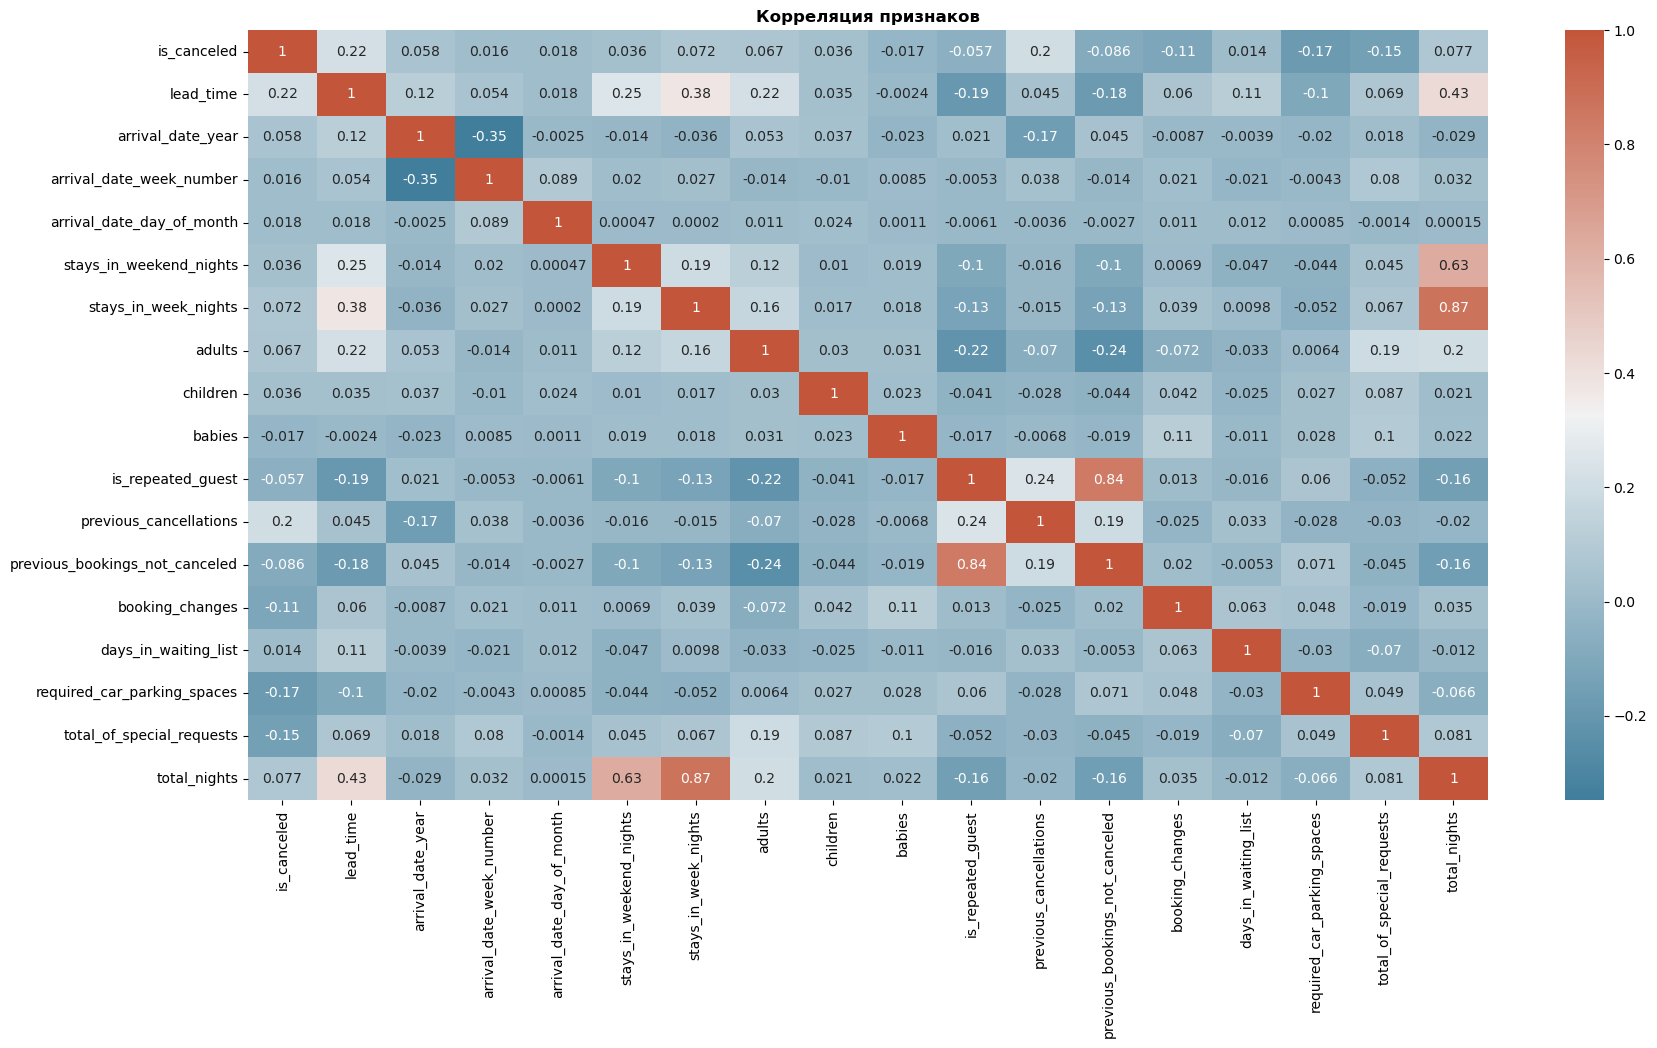

In [39]:
plt.figure(figsize=(20, 10))
plt.title('Корреляция признаков', weight = 'bold')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_train.corr(method='spearman',numeric_only=True), annot = True, cmap=cmap)
plt.show()

Явно выделяют, что не удивительно взаимосвязь обих ночей и проживания в будни и выходные, удалять столбцы не буду, так как на мой взгляд это модет повлиять на обучение, также есть зависимость повторяющего гостя и не отменой бронирования,в меньшей мере, но просматривается зависимость окна бронирования и проживания на будни и от общего кол-ва ночей

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 

Стоимость номеров отеля:

категория A: за ночь — 1 000, разовое обслуживание — 400;

категория B: за ночь — 800, разовое обслуживание — 350;

категория C: за ночь — 600, разовое обслуживание — 350;

категория D: за ночь — 550, разовое обслуживание — 150;

категория E: за ночь — 500, разовое обслуживание — 150;

категория F: за ночь — 450, разовое обслуживание — 150;

категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.

На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.


Пропишем цену и затраты на обслуживание в переменную

In [40]:
price = {"A" : 1000, 
         "B" : 800, 
         "C" : 600, 
         "D" : 550,
         "E" : 500,
         "F" : 450,
         "G" : 350}

cost = {"A" : 400,
        "B" : 350,
        "C" : 350,
        "D" : 150,
        "E" : 150,
        "F" : 150,
        "G" : 150}

На основании условий,пропишем функции для дохода, затрат и издержек от отмен в функцию и добавим в данные

In [41]:
def room_cost (row):
    if row.is_canceled == 1:
        return 0
    if row.total_nights <= 2:
        return cost[row.reserved_room_type]
    else:
        return cost[row.reserved_room_type]*(row.total_nights//2+1)

In [42]:
def room_revenue (row):  
    
    if row.arrival_date_month in ['June','July','August']:
        
        cf =1.4
    elif row.arrival_date_month in ['December','February','January']:
        
        cf = 1
    else:
        cf = 1.2
        
    if  row.is_canceled == 1:    
        cf = 0
        
    return price[row.reserved_room_type]*(row.total_nights)*cf

туплю, но не могу посчитать, как-то запутался в конце

In [43]:
def expenses (row):   
    if row.arrival_date_month in ['June','July','August']:
        cf =1.4
    elif row.arrival_date_month in ['December','February','January']:
        cf = 1
    else:
        cf = 1.2
    if row.is_canceled == 1: 
        cancelled_cost = price[row.reserved_room_type]*cf + cost[row.reserved_room_type]*cf
    if row.is_canceled == 0:
        cancelled_cost = 0
    return cancelled_cost

In [44]:
df_train['room_revenue'] = df_train.apply(room_revenue, axis=1)
df_train['room_cost'] = df_train.apply(room_cost, axis=1)
df_train['expenses'] = df_train.apply(expenses, axis=1)

In [45]:
df_train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,room_revenue,room_cost,expenses
0,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1,"1,400.00",400,0.00
1,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2,"2,800.00",400,0.00
2,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2,"1,680.00",350,0.00
3,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2,"1,680.00",350,0.00
4,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3,0.00,0,"1,960.00"


In [46]:
print('Доход по румам за 2015-2016 =:', df_train['room_revenue'].sum(),'у.е.')
print()
print('Расход на обслуживание номеров за 2015-2016 =:', df_train['room_cost'].sum(),'у.е.')
print()
print('Прибыли отеля вкл. издержки за 2015-2016 =:', df_train['room_revenue'].sum()-df_train['room_cost'].sum()-df_train['expenses'].sum(),'у.е.')
print()
print('Издержки связанные с отменой номеров за 2015-2016 =:', df_train['expenses'].sum(),'у.е.')

Доход по румам за 2015-2016 =: 105575550.0 у.е.

Расход на обслуживание номеров за 2015-2016 =: 21811800 у.е.

Прибыли отеля вкл. издержки за 2015-2016 =: 67764240.0 у.е.

Издержки связанные с отменой номеров за 2015-2016 =: 15999510.0 у.е.


In [47]:
df_test['room_revenue'] = df_test.apply(room_revenue, axis=1)
df_test['room_cost'] = df_test.apply(room_cost, axis=1)
df_test['expenses'] = df_test.apply(expenses, axis=1)

In [48]:
print('Доход по румам за 2017 =:', df_test['room_revenue'].sum(),'у.е.')
print()
print('Расход на обслуживание номеров за 2017 =:', df_test['room_cost'].sum(),'у.е.')
print()
print('Прибыли отеля за 2017 =:', df_test['room_revenue'].sum()-df_test['room_cost'].sum()-df_test['expenses'].sum(),'у.е.')
print()
print('Издержки связанные с отменой номеров за 2017 =:', df_test['expenses'].sum(),'у.е.')

Доход по румам за 2017 =: 65288980.0 у.е.

Расход на обслуживание номеров за 2017 =: 13339450 у.е.

Прибыли отеля за 2017 =: 32902730.0 у.е.

Издержки связанные с отменой номеров за 2017 =: 19046800.0 у.е.


In [49]:
revenue_2015=df_train.query('arrival_date_year == 2015').reset_index(drop=True)['room_revenue'].sum()
revenue_2016=df_train.query('arrival_date_year == 2016').reset_index(drop=True)['room_revenue'].sum()
revenue_2017=df_test.query('arrival_date_year == 2017').reset_index(drop=True)['room_revenue'].sum()
cost_2015=df_train.query('arrival_date_year == 2015').reset_index(drop=True)['room_cost'].sum()
cost_2016=df_train.query('arrival_date_year == 2016').reset_index(drop=True)['room_cost'].sum()
cost_2017=df_test.query('arrival_date_year == 2017').reset_index(drop=True)['room_cost'].sum()
expenses_2015=df_train.query('arrival_date_year == 2015').reset_index(drop=True)['expenses'].sum()
expenses_2016=df_train.query('arrival_date_year == 2016').reset_index(drop=True)['expenses'].sum()
expenses_2017=df_test.query('arrival_date_year == 2017').reset_index(drop=True)['expenses'].sum()
profit_2015=revenue_2015-cost_2015-expenses_2015
profit_2016=revenue_2016-cost_2016-expenses_2016
profit_2017=revenue_2017-cost_2017-expenses_2017

In [50]:
print('Доход по румам за 2015 год составила:', revenue_2015,'у.е.')
print()
print('Доход по румам за 2016 год составила:', revenue_2016,'у.е.')
print()
print('Доход по румам за 2017 год составила:', revenue_2017,'у.е.')
print()
print('издержки  по румам за 2015 год составила:', expenses_2015,'у.е.')
print()
print('издержки по румам за 2016 год составила:', expenses_2016,'у.е.')
print()
print('издержки по румам за 2017 год составила:', expenses_2017,'у.е.')
print()
print('прибыль по румам за 2015 год составила:', profit_2015,'у.е.')
print()
print('прибыль по румам за 2016 год составила:', profit_2016,'у.е.')
print()
print('прибыль по румам за 2017 год составила:', profit_2017,'у.е.')
print()

Доход по румам за 2015 год составила: 27028160.0 у.е.

Доход по румам за 2016 год составила: 78547390.0 у.е.

Доход по румам за 2017 год составила: 65288980.0 у.е.

издержки  по румам за 2015 год составила: 3168360.0 у.е.

издержки по румам за 2016 год составила: 12831150.0 у.е.

издержки по румам за 2017 год составила: 19046800.0 у.е.

прибыль по румам за 2015 год составила: 18331300.0 у.е.

прибыль по румам за 2016 год составила: 49432940.0 у.е.

прибыль по румам за 2017 год составила: 32902730.0 у.е.



# Таким образом, посчитав доход, прибыль и издержки связанные с отменой номеров, можно сделать выводы, что 

1) Доходы Гостиницы растут с каждым годом,т.е. за 8 месяцев 2017 года Гостиница по румам заработала на 13 млн. меньше, но при этом среднемесячный доход показывает рост на 25 %

2) прибыль также,показывает рост, что в целом неудивительно, так как расходы остаются на одном уровне..

3) А вот издержки связанные с отменной бронирований за 8 месяцев 2017 на 3 млн.руб. выше. на первый взгляд это является хорошим решением для инвестирования в разработку системы прогнозирования. 

### Шаг 4. Разработка модели ML

Предобработка для моделей

Преобразуем данные и зададим целевой показатель

закодируем порядковые переменные

In [51]:
df_train_s=df_train.copy()
df_test_s=df_test.copy()

1) Удалим из данных созданные по заданию столбцы

In [52]:
df_train_s = df_train_s.drop('room_revenue', axis=1)
df_test_s = df_test_s.drop('room_revenue', axis=1)


In [53]:
df_train_s = df_train_s.drop('room_cost', axis=1)
df_test_s = df_test_s.drop('room_cost', axis=1)

In [54]:
df_train_s = df_train_s.drop('expenses', axis=1)
df_test_s= df_test_s.drop('expenses', axis=1)

In [55]:
#НАЧАЛО КОДА РЕВЬЮЕРА

In [56]:
target_train = df_train_s['is_canceled']
df_train_s = df_train_s.drop('is_canceled', axis=1)

target_test = df_test_s['is_canceled']
df_test_s = df_test_s.drop('is_canceled', axis=1)

In [57]:
categor_number_new = ['arrival_date_month','meal','country','distribution_channel','is_repeated_guest','reserved_room_type','customer_type']
digit_new = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
           'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
            'required_car_parking_spaces','total_of_special_requests','total_nights']

In [58]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(df_train_s[categor_number_new])

# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
df_train_s[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(df_train_s[categor_number_new])

# удаляем незакодированные категориальные признаки (изначальные колонки)
df_train_s = df_train_s.drop(categor_number_new, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
df_train_s[digit_new] = scaler.fit_transform(df_train_s[digit_new])

# смотрим на результат
df_train_s.head()


C:\Users\lebed\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,country_BRA,country_CHE,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_USA,country_other,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,is_repeated_guest_1,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.82,-1.86,-0.29,-1.68,-1.03,-0.90,-1.70,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,-0.84,-1.18,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,-0.73,-1.86,-0.29,-1.68,-1.03,-0.21,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,0.41,-0.64,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,-0.92,-1.86,-0.29,-1.68,-1.03,-0.21,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,-0.84,-0.64,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,-0.80,-1.86,-0.29,-1.68,-1.03,-0.21,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,0.41,-0.64,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.23,-1.86,-0.29,-1.68,-1.03,0.47,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,0.41,-0.11,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [59]:
df_test_s[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(df_test_s[categor_number_new])

df_test_s = df_test_s.drop(categor_number_new, axis=1)

# скелером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, масштабируем тестовую
df_test_s[digit_new] = scaler.transform(
    df_test_s[digit_new]
)

# смотрим на результат
df_test_s.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,country_BRA,country_CHE,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_USA,country_other,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,is_repeated_guest_1,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.08,2.93,-2.17,-1.68,0.12,-1.59,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,-0.84,-1.18,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,-0.08,2.93,-2.17,-1.68,1.27,-0.21,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,0.41,0.42,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,-0.08,2.93,-2.17,-1.68,1.27,-0.21,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,0.41,0.42,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.04,2.93,-2.17,-1.68,1.27,-0.21,-1.70,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,0.41,0.42,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,1.41,2.93,-2.17,-1.68,1.27,1.85,0.28,-0.27,-0.10,-0.09,-0.10,-0.37,-0.08,-0.30,-0.84,2.02,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [60]:
features_train = df_train_s
features_test = df_test_s

#  Модель дерево решений

In [61]:
scorer = make_scorer(f1_score, zero_division=0)

In [62]:
best_tree_model = None
best_tree_result = 0

for depth in range (1, 11):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth,class_weight='balanced')
    result = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring=scorer))
    if result > best_tree_result:
        best_tree_model = model
        best_tree_result = result
        best_tree_depth = depth

print('Наилучший результат:')
print(best_tree_result)
print('Наилучшая глубина дерева:')
display(best_tree_depth)

Наилучший результат:
0.5182122264973055
Наилучшая глубина дерева:


6

#  Модель Случайный лес

In [63]:
best_forest_model = None
best_forest_result = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth,class_weight='balanced')
        result = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring=scorer))
        if result > best_forest_result:
            best_forest_model = model
            best_forest_result = result
            best_forest_est = est
            best_forest_depth = depth
      
print('Наилучший результат:')
print(best_forest_result)
print('Наилучшее кол-во деревьев:')
display(best_forest_est)
print('Наилучшая максимальная глубина дерева:')
display(best_forest_depth)

Наилучший результат:
0.41223331209360214
Наилучшее кол-во деревьев:


20

Наилучшая максимальная глубина дерева:


5

#  Модель Логистической регрессии

In [64]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',class_weight='balanced')
logistic_result = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring=scorer))
print('Наилучший результат:')
print(logistic_result)
print('Результат на валидационной выборке:')
display(logistic_result)

Наилучший результат:
0.34128919088277737
Результат на валидационной выборке:


0.34128919088277737

In [65]:
all_datas = [best_forest_result, best_tree_result, logistic_result]
all_datas_df = pd.DataFrame([all_datas],
                         columns=['Случаный лес', 'Дерево решений', 'Логистическая регрессия'],
                        index=['показатель'])
all_datas_df

,Случаный лес,Дерево решений,Логистическая регрессия
показатель,0.41,0.52,0.34


 Использовали метрику f1-score, т.к. нам нужно минимизировать риски связанные с неудачным предсказанием, таким образом выбрав модель, которая более точно будет предсказывать отмену бронирования для получения дополнительного дохода

Как видно, лучший результат показала модель Дерево решений, второй Логистистическая регрессия и последняя модель Случайного леса.

Будем использовать для обучения модель дерево решений

In [66]:
best_tree_model.fit(features_train, target_train)
predictions_test = best_tree_model.predict(features_test)
f1_score(target_test, predictions_test)

0.6650271619439143

In [67]:
df_test['predictions'] = predictions_test
display(df_test)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,room_revenue,room_cost,expenses,predictions
0,1,74,2017,January,1,1,1,0,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1,0.00,0,"1,400.00",1
1,1,62,2017,January,1,1,2,2,2,0,0,BB,other,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0.00,0,"1,400.00",0
2,1,62,2017,January,1,1,2,2,2,0,0,BB,other,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0.00,0,"1,400.00",0
3,1,71,2017,January,1,1,2,2,1,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0.00,0,"1,400.00",1
4,1,172,2017,January,1,1,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,0.00,0,"1,400.00",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164,2017,August,35,31,2,4,2,0,0,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,0,6,"8,400.00",1600,0.00,1
32408,0,21,2017,August,35,30,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,2,7,"9,800.00",1600,0.00,1
32409,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,"9,800.00",1600,0.00,1
32410,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,4,7,"5,390.00",600,0.00,1


In [68]:
def cf(row):
    if (row == 'January'
     or  row == 'February'
     or row == 'December'):
        return '1'
    if (row == 'June'
        or row == 'July' 
        or row =='August'):
        return '1.4'
    else:
        return '1.2'
df_train['cf'] = df_train['arrival_date_month'].apply(cf)
df_test['cf'] = df_test['arrival_date_month'].apply(cf)

In [69]:
def price(row):
    if row == 'A':
        return '1000'
    if row == 'B': 
        return '800'
    if row == 'C':
        return '600'
    if row == 'D':
        return '550'
    if row == 'E': 
        return '500'
    if row == 'F':
        return '450'
    if row == 'G':
        return '350'
df_train['price'] = df_train['reserved_room_type'].apply(price)
df_test['price'] = df_test['reserved_room_type'].apply(price)

In [70]:
def cost(row):
    if row == 'A':
        return '400'
    if (row == 'B'
       or row == 'C'): 
        return '350'
    else:
        return '150'
df_train['cost'] = df_train['reserved_room_type'].apply(cost)
df_test['cost'] = df_test['reserved_room_type'].apply(cost)

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     32412 non-null  int64  
 1   lead_time                       32412 non-null  int64  
 2   arrival_date_year               32412 non-null  int64  
 3   arrival_date_month              32412 non-null  object 
 4   arrival_date_week_number        32412 non-null  int64  
 5   arrival_date_day_of_month       32412 non-null  int64  
 6   stays_in_weekend_nights         32412 non-null  int64  
 7   stays_in_week_nights            32412 non-null  int64  
 8   adults                          32412 non-null  int64  
 9   children                        32412 non-null  int64  
 10  babies                          32412 non-null  int64  
 11  meal                            32412 non-null  object 
 12  country                         

In [72]:
df_train[['price','cost','room_revenue','expenses']] = df_train[['price','cost','room_revenue','expenses']].astype('int64')
df_train[['cf']] = df_train[['cf']].astype('float64')
df_test[['price','cost','room_revenue','expenses']] = df_test[['price','cost','room_revenue','expenses']].astype('int64')
df_test[['cf']] = df_test[['cf']].astype('float64')

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     32412 non-null  int64  
 1   lead_time                       32412 non-null  int64  
 2   arrival_date_year               32412 non-null  int64  
 3   arrival_date_month              32412 non-null  object 
 4   arrival_date_week_number        32412 non-null  int64  
 5   arrival_date_day_of_month       32412 non-null  int64  
 6   stays_in_weekend_nights         32412 non-null  int64  
 7   stays_in_week_nights            32412 non-null  int64  
 8   adults                          32412 non-null  int64  
 9   children                        32412 non-null  int64  
 10  babies                          32412 non-null  int64  
 11  meal                            32412 non-null  object 
 12  country                         

In [74]:
def new_profit(row):
    if (row['predictions'] == 1
       and row['is_canceled'] == 1):
        
        dep = ((row['price'] + row['cost']))*0.8 - row['expenses']          
    if row['is_canceled'] == 0:
        dep = row['room_revenue']-row['room_cost']
    if (row['predictions'] == 0
       and row['is_canceled'] == 1):
        dep =  -row['expenses']
    return dep
df_test['profit_with_deposit'] = df_test.apply(new_profit, axis=1)
display(df_test)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,room_revenue,room_cost,expenses,predictions,cf,price,cost,profit_with_deposit
0,1,74,2017,January,1,1,1,0,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1,0,0,1400,1,1.00,1000,400,-280.00
1,1,62,2017,January,1,1,2,2,2,0,0,BB,other,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0,0,1400,0,1.00,1000,400,"-1,400.00"
2,1,62,2017,January,1,1,2,2,2,0,0,BB,other,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0,0,1400,0,1.00,1000,400,"-1,400.00"
3,1,71,2017,January,1,1,2,2,1,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0,0,1400,1,1.00,1000,400,-280.00
4,1,172,2017,January,1,1,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,0,0,1400,1,1.00,1000,400,-280.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164,2017,August,35,31,2,4,2,0,0,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,0,6,8400,1600,0,1,1.40,1000,400,"6,800.00"
32408,0,21,2017,August,35,30,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,2,7,9800,1600,0,1,1.40,1000,400,"8,200.00"
32409,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,9800,1600,0,1,1.40,1000,400,"8,200.00"
32410,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,4,7,5390,600,0,1,1.40,550,150,"4,790.00"


In [75]:
print('Прибыль за 2017 год без учета депозита составила:', profit_2017)
print('Прибыль за 2017 год с учетом депозита составит:', df_test['profit_with_deposit'].sum())
print('PP :', df_test['profit_with_deposit'].sum()-profit_2017- 400000)

Прибыль за 2017 год без учета депозита составила: 32902730.0
Прибыль за 2017 год с учетом депозита составит: 41900023.0
PP : 8597293.0


Таким образом, прибыль за не полный 2017 год могла бы составить 41,9 млн. у.е. с учетом взятого депозита, без депозита прибыль составила 32,9 млн.у.е., что по оценкам и при использовании модели позволилобы с учетом возврата инвестиций заработать дополнительно 8,6 млн. у.е. 

### Шаг 5. Опишите портрет «ненадёжного» клиента

Для описания портерета ненадежного клиента, рассмотрит разные разрезы и постараемся выявить закономерности

In [76]:
person_canceled_booking=df_test.query('is_canceled == 1').reset_index(drop=True)

In [77]:
person_canceled_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,room_revenue,room_cost,expenses,predictions,cf,price,cost,profit_with_deposit
count,"12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00","12,591.00"
mean,1.00,123.51,"2,017.00",18.23,15.56,0.87,2.42,1.91,0.09,0.00,0.00,0.00,0.02,0.11,0.37,0.00,0.43,3.29,0.00,0.00,"1,512.73",0.72,1.24,884.60,340.47,-798.14
std,0.00,87.53,0.00,8.74,8.74,0.86,1.32,0.46,0.36,0.04,0.06,0.09,0.43,0.46,5.20,0.00,0.71,1.64,0.00,0.00,415.63,0.45,0.14,202.85,105.85,511.83
min,1.00,0.00,"2,017.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,500.00,0.00,1.00,350.00,150.00,"-1,960.00"
25%,1.00,52.00,"2,017.00",12.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,"1,400.00",0.00,1.20,"1,000.00",400.00,-840.00
50%,1.00,111.00,"2,017.00",18.00,15.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,"1,680.00",1.00,1.20,"1,000.00",400.00,-560.00
75%,1.00,177.00,"2,017.00",25.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,0.00,0.00,"1,960.00",1.00,1.40,"1,000.00",400.00,-420.00
max,1.00,373.00,"2,017.00",35.00,31.00,4.00,6.00,4.00,3.00,1.00,1.00,4.00,26.00,6.00,183.00,0.00,5.00,10.00,0.00,0.00,"1,960.00",1.00,1.40,"1,000.00",400.00,-100.00


Превоначальный срез показывает, что ненадежным клиентом является человек, в среднем забронировашийся за 123 дня, в большей степени проживающий на буднях. Бронирования было создано на 2 взрослых гостей, без детей. Так как большое кол-во новых гостей, то и отмен у них не очень много. такие люди не делают изменений в бронированиях. при этом это бронирование в среднем показывает проживание  более чем на 3 ночи.

In [78]:
display(person_canceled_booking['country'].value_counts())
display(df_test['country'].value_counts())

country
PRT      5893
other    1565
GBR      1069
FRA       857
ESP       614
DEU       573
ITA       491
BRA       393
IRL       334
USA       239
BEL       216
CHE       184
NLD       163
Name: count, dtype: int64

country
PRT      9887
other    4750
GBR      3927
FRA      3477
DEU      2378
ESP      1932
ITA      1153
IRL      1060
BEL       882
BRA       881
USA       774
NLD       709
CHE       602
Name: count, dtype: int64

Основную массу отмен, составляют граждене из Португалии, хотя они их и в общем больше, но процент отмен у них составляет практически 60 %. в то время, как у граждан, например, великобритании данный процет составляет 30 %, что в два раза ниже.

In [79]:
person_prediction_canceled_booking=df_test.query('predictions == 1').reset_index(drop=True)

In [80]:
person_prediction_canceled_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,room_revenue,room_cost,expenses,predictions,cf,price,cost,profit_with_deposit
count,"14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00","14,653.00"
mean,0.62,114.22,"2,017.00",18.62,16.11,0.90,2.40,1.89,0.08,0.00,0.01,0.01,0.05,0.15,0.35,0.00,0.18,3.29,"1,366.75",271.66,946.69,1.00,1.24,881.74,338.63,762.44
std,0.49,81.20,0.00,9.09,8.78,0.86,1.33,0.48,0.35,0.06,0.10,0.11,0.82,0.51,5.07,0.00,0.52,1.66,"2,182.00",435.25,808.62,0.00,0.14,204.72,107.09,"1,983.82"
min,0.00,0.00,"2,017.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,350.00,150.00,-840.00
25%,0.00,46.00,"2,017.00",12.00,9.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,1.00,1.20,800.00,350.00,-560.00
50%,1.00,102.00,"2,017.00",19.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,980.00,1.00,1.20,"1,000.00",400.00,-280.00
75%,1.00,165.00,"2,017.00",25.00,24.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,"2,400.00",400.00,"1,680.00",1.00,1.40,"1,000.00",400.00,"2,000.00"
max,1.00,373.00,"2,017.00",35.00,31.00,4.00,6.00,4.00,3.00,2.00,1.00,6.00,65.00,10.00,183.00,0.00,5.00,10.00,"14,000.00","2,400.00","1,960.00",1.00,1.40,"1,000.00",400.00,"11,600.00"


в рамках предсказания, видно, что клиент, который отменит бронирование, сделает его уже за 114 дней,это также, будет бронирование на двух взрослых гостей без детей,и бронирование будет приходится на будни дни. срок проживания также 3 ночи.

In [81]:
display(person_prediction_canceled_booking['country'].value_counts())
display(df_test['country'].value_counts())

country
PRT      7241
other    1523
GBR      1238
FRA      1194
DEU       887
ESP       495
ITA       467
IRL       355
BEL       289
BRA       285
USA       268
CHE       214
NLD       197
Name: count, dtype: int64

country
PRT      9887
other    4750
GBR      3927
FRA      3477
DEU      2378
ESP      1932
ITA      1153
IRL      1060
BEL       882
BRA       881
USA       774
NLD       709
CHE       602
Name: count, dtype: int64

а вот по стране видно, что модель оценила, граждан из Португалии еще менее надежными и увеличила их долю до 74 %. остальные гости остались приблизительно на том же уровне.

# Подвем итоги

Как видно из представленной информации, самым ненадежным клиентом можно считать гражданина из португалии, который делает бронирование на двух взрослых без детей от 100 до 130 дней, на будни и в среднем на трое суток. Это не возртаный гость, так как на корреляции мы увидели, что есть зависимость не отмен. данный тип гостей, практически не вносит изменений в бронирования.

# Общий вывод по проекту:

1) были предоставлены данные тренировчные и тестовые по Гостинице, тренировочные представлены за период с июля 2015 по декабрь 2016 года

2) предобработали данные, привели их к общему формату. удалили не информативные столбцы, например, id. Также, просмотрели дублекаты и удалили их. Убрали в столбцах нелогичные значения. Провели корреляционный анализ,выявив  взаимосвязь общего кол-ва нн и проживания в будни и выходные, зависимость повторяющего гостя и не отменой бронирования, зависимость окна бронирования и проживания на будни и от общего кол-ва ночей

3) Посчитали прибыль,затраты и издержки за период и  по годам

4) создали три модели. выявили модель с наилучшим показателем f1, ей стала модель дерево решений, которую мы применили на тестовой выборки и далее посчитали уже прибыль за тестовый период в 2017 году. выявив, что даже с учетом разработки, дополнительная потенциальная прибыль, может составить порядка 8 млн. у.е. только за 8 месяцев

5) провели анализ не надежного клиента , им оказался гражданин Португалии, который бронируется на двух человек без детей, более чем за 100 дней и со сроком проживания порядка 3 ночей